In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'])
df.set_index('date',inplace= True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [48]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))] 
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


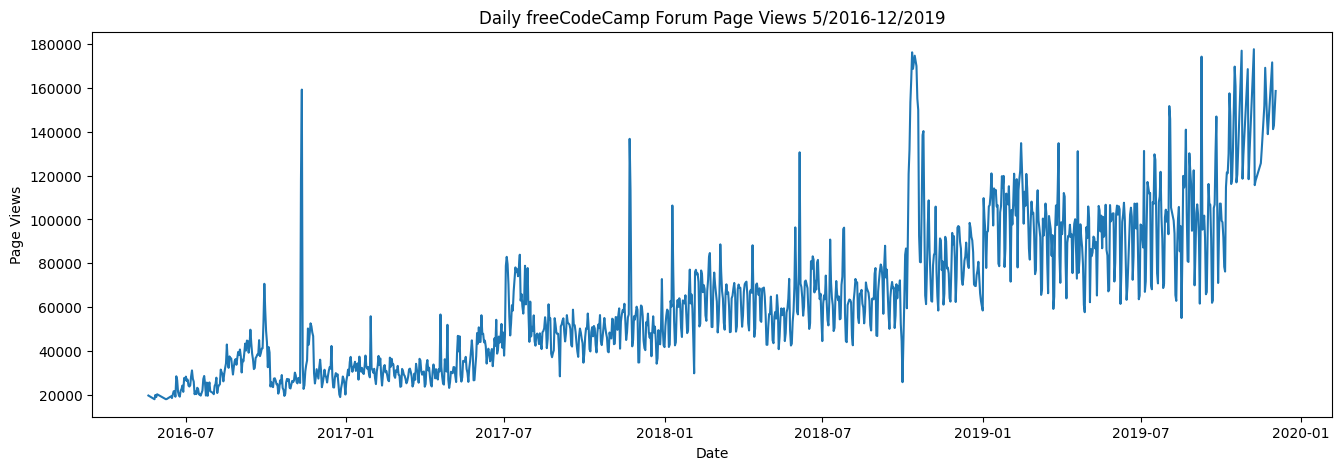

In [80]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.plot(df)

fig.savefig('lineplot.png')

In [50]:
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month_name()

df_bar = pd.DataFrame(df_bar.groupby(["year", "month"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.reset_index()
missing_data = {
        "year": [2016, 2016, 2016, 2016],
        "month": ['January', 'February', 'March', 'April'],
        "value": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])
df_bar

,year,month,value
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
0,2016,May,19432
1,2016,June,21875
2,2016,July,24110
3,2016,August,31049
4,2016,September,41477
5,2016,October,27398


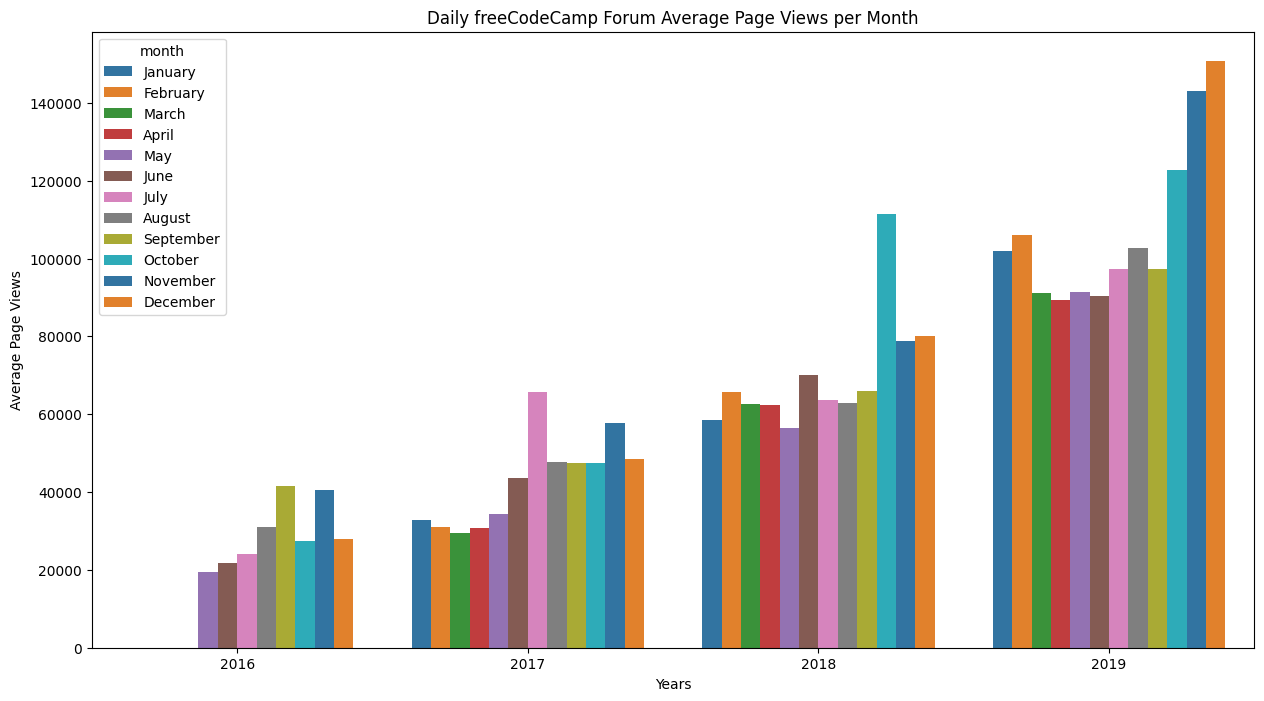

In [81]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
chart = sns.barplot(data=df_bar, x="year", y="value", hue="month", palette="tab10")
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
fig.savefig('barplot.png')

In [76]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


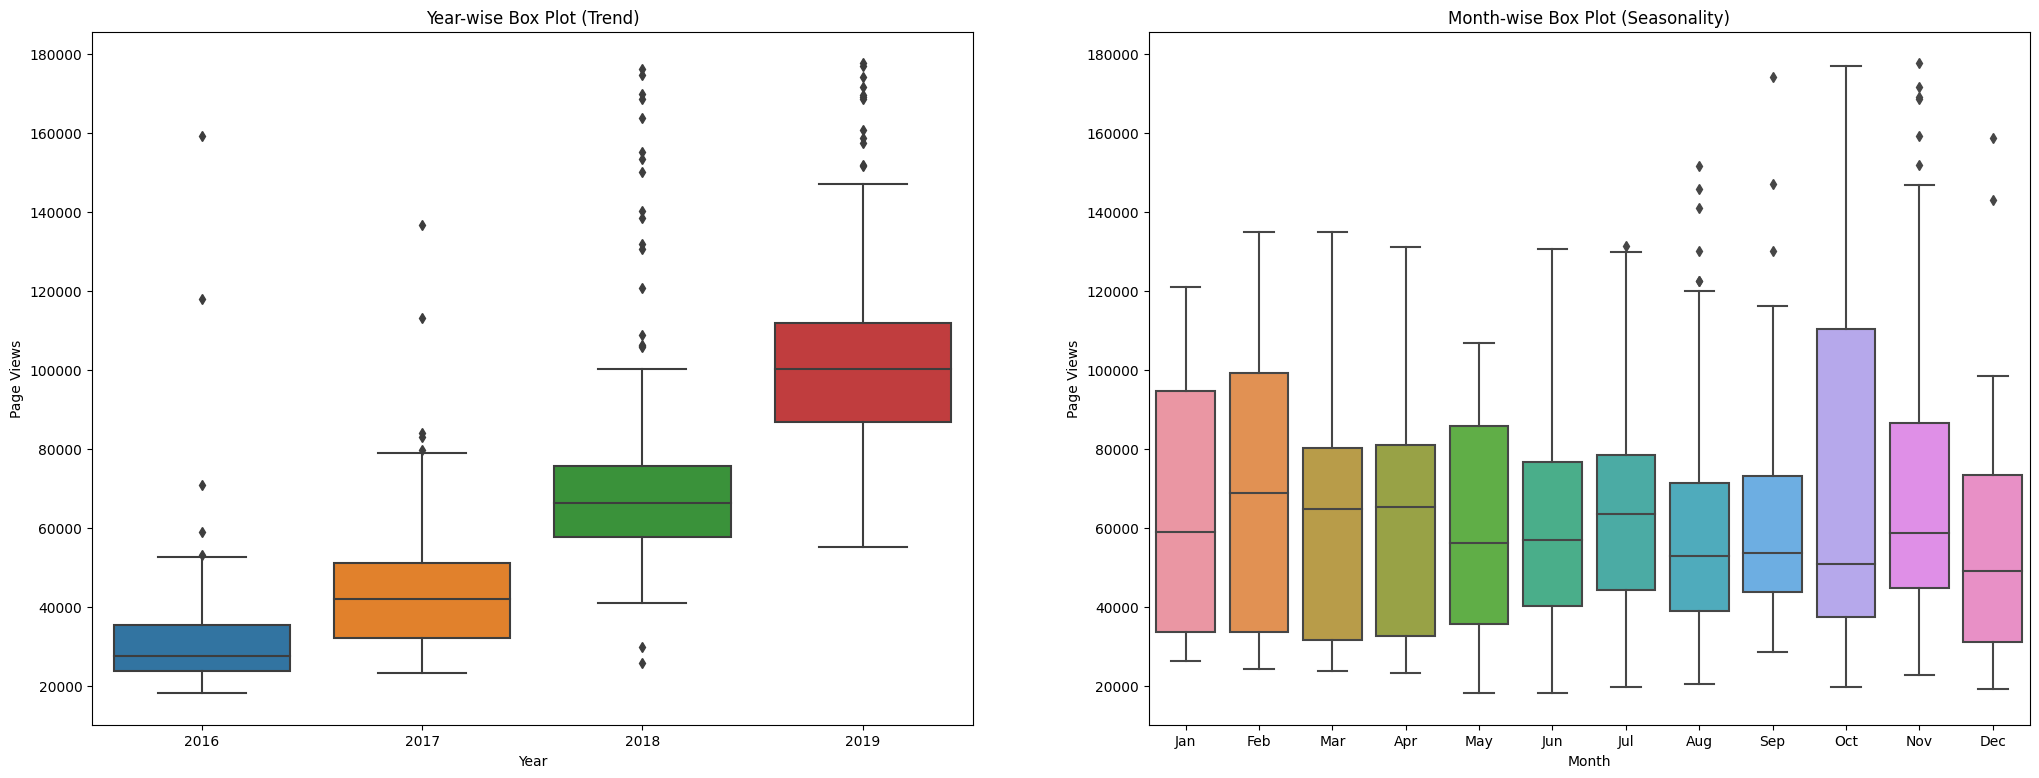

In [79]:
fig,axs = plt.subplots(1,2,figsize=(25,9))

sns.boxplot(data=df_box, x="year", y="value", ax=axs[0])
axs[0].set_title("Year-wise Box Plot (Trend)")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Page Views")
    
# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order,  ax=axs[1])
axs[1].set_title("Month-wise Box Plot (Seasonality)")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Page Views")
fig.savefig('boxplot.png')

